In [1]:
import pandas as pd
import numpy as np

from os.path import join

from fixation_extraction import IVT
from aoi_defining import threshold_based, _get_fixation_density, gradient_based
from eyetracking.visualization import static_visualization
from scipy.ndimage import maximum_filter, sobel

from bisect import bisect_left

DATA_PATH = join('..', 'test_data')

In [2]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

In [3]:
data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_fix_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_fix_3.xlsx'))], axis=0)
data = remove_points(data, 0, 1, 0, 1)

In [4]:
%%time
res = threshold_based(data, x='norm_pos_x', y='norm_pos_y', pk=['Participant', 'tekst'], W=10, threshold=3)

CPU times: user 19.7 s, sys: 1.64 s, total: 21.3 s
Wall time: 12.3 s


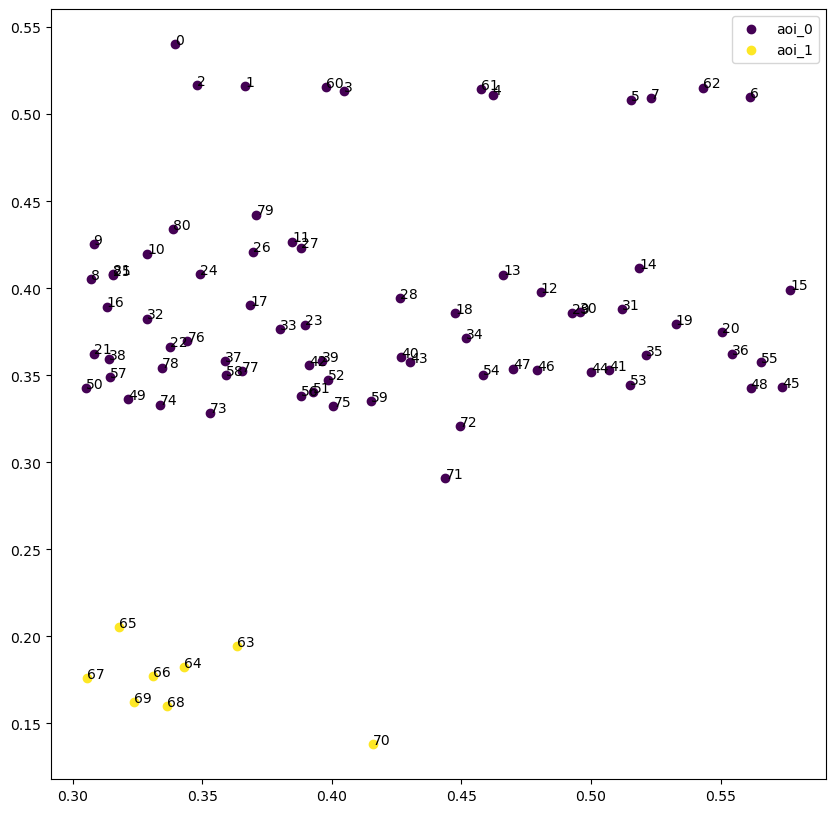

In [5]:
static_visualization.scanpath_visualization(res[(res['Participant'] == 1) & (res['tekst'] == 15)], "norm_pos_x", "norm_pos_y", duration="duration", dispersion="dispersion", time_stamps="start_timestamp", points_enumeration=True, regression_color="red", micro_sac_color="yellow",  is_vectors=True, aoi='AOI', only_points=True)

In [6]:
%%time
res_basic = threshold_based(data, x='norm_pos_x', y='norm_pos_y', pk=['Participant', 'tekst'], W=10, threshold=3, type='basic', threshold_dist=0.3)

CPU times: user 22.8 s, sys: 1.45 s, total: 24.3 s
Wall time: 12.4 s


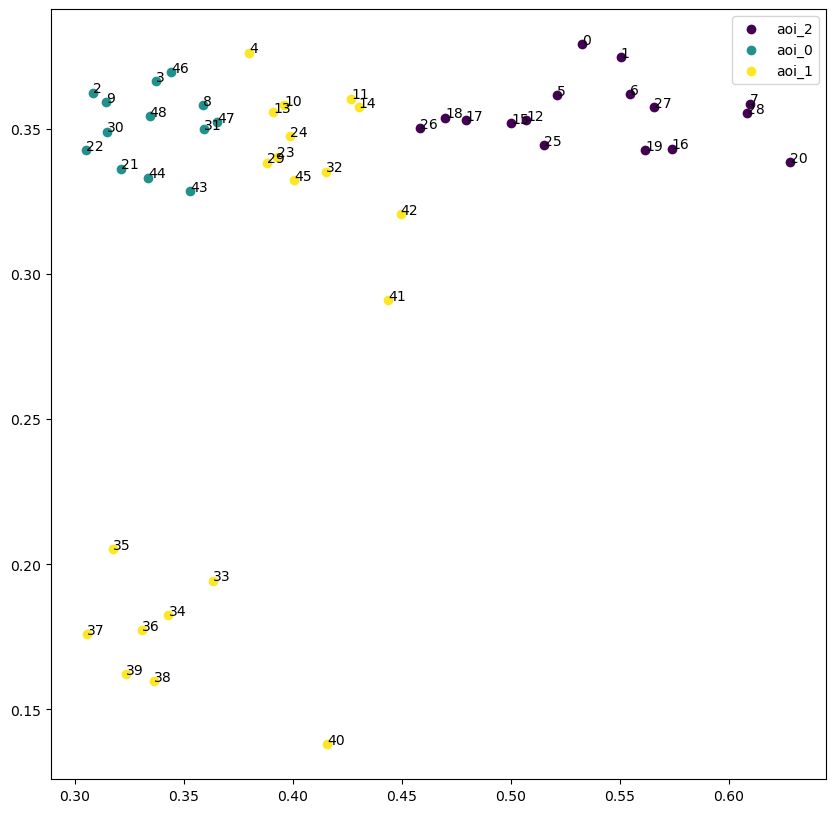

In [7]:
static_visualization.scanpath_visualization(res_basic[(res_basic['Participant'] == 1) & (res_basic['tekst'] == 15)], "norm_pos_x", "norm_pos_y", duration="duration", dispersion="dispersion", time_stamps="start_timestamp", points_enumeration=True, regression_color="red", micro_sac_color="yellow",  is_vectors=True, aoi='AOI', only_points=True)

In [8]:
data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_gaze_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_gaze_2.xlsx'))], axis=0)

data.drop(['world_index', 'confidence', 'base_data'], axis=1, inplace=True)
data = remove_points(data, -1, 1, -1, 1)
data['gaze_timestamp'] = data['gaze_timestamp']

In [9]:
x = 'norm_pos_x'
y = 'norm_pos_y'
t = 'gaze_timestamp'

ivt = IVT(x=x, y=y, t=t, pk=['Participant', 'tekst'], threshold=0.10)

In [10]:
data_ivt = ivt.transform(data)
data_ivt

/home/zahar/EyeFeatures/eyetracking/preprocessing/fixation_extraction.py:28: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "transform" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/zahar/EyeFeatures/eyetracking/preprocessing/fixation_extraction.py (35)

File "fixation_extraction.py", line 35:
    def transform(self, X: pd.DataFrame) -> Union[pd.DataFrame, np.ndarray]:
        <source elided>
        else:
            fixations = None
            ^

  @jit(forceobj=True, looplift=True)


,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,duration
0,1,1,0.242056,0.510704,317242.694809,317242.715197,0.000988,0.012066,0.020388
1,1,1,0.243933,0.507985,317242.728767,317242.766803,0.000971,0.010593,0.038036
2,1,1,0.244890,0.507302,317242.779258,317242.779258,0.002909,0.002909,0.000000
3,1,1,0.243674,0.473291,317242.805314,317243.004508,0.000679,0.054160,0.199194
4,1,1,0.246791,0.435542,317243.017989,317243.024352,0.000697,0.001653,0.006363
...,...,...,...,...,...,...,...,...,...
51153,2,37,0.376292,0.619985,1834.312914,1834.318381,0.001401,0.001402,0.005467
51154,2,37,0.376239,0.620591,1834.331099,1834.331099,0.003480,0.003480,0.000000
51155,2,37,0.376137,0.616913,1834.343663,1834.343663,0.000851,0.000851,0.000000
51156,2,37,0.376363,0.617434,1834.355116,1834.365957,0.000878,0.003641,0.010841
